# Projeto Final - Sistemas de Recuperação da Informação - Parte 2

### Julio Bruce da Motta Azevedo

## MODELANDO ASSUNTOS


## Biblioteca Gensim

In [1]:
# Utlizaremos a biblioteca Gensim para a modelagem de assuntos.
# Necessitamos importar mais bibliotecas.

from gensim import corpora, models, similarities
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
from string import punctuation
from pprint import pprint

In [2]:
import nltk
#nltk.download_gui()

## Definindo um problema:

### A crescente demanda pelo acesso a informações de forma remota, com rapidez, sem prejuízo à credibilidade, foi bastante aumentada em 2020.

### Neste notebook buscamos montar uma ferramenta para analisar um corpus de artigos publicados sobre os mais diversos assuntos, por uma agência de notícias acreditada mundialmente (Reuters), e tentar modelar os assuntos existentes, por mais heterogêneos que o sejam.

In [3]:
# Com o módulo corpora, do Gensim, criamos nosso dicionário.

dicionario = corpora.Dictionary.load('vocabulario_reuters.dict')
corpus = corpora.MmCorpus('reuters.mm')

In [4]:
# Verificando o formato e 'tamanho'.

print(dicionario)
print(corpus)
14991*10788

Dictionary(14991 unique tokens: ['', '1', '10', '15', '17']...)
MmCorpus(10788 documents, 14991 features, 655414 non-zero entries)


161722908

In [5]:
# Verificando o sucesso da construção da vetorização.

print(dicionario[10])
for doc in corpus[:2]:
    print(doc)

6
[(0, 14.0), (1, 1.0), (2, 1.0), (3, 1.0), (4, 1.0), (5, 1.0), (6, 1.0), (7, 1.0), (8, 1.0), (9, 1.0), (10, 1.0), (11, 1.0), (12, 1.0), (13, 1.0), (14, 1.0), (15, 1.0), (16, 1.0), (17, 1.0), (18, 1.0), (19, 2.0), (20, 2.0), (21, 4.0), (22, 1.0), (23, 2.0), (24, 1.0), (25, 4.0), (26, 1.0), (27, 1.0), (28, 2.0), (29, 1.0), (30, 1.0), (31, 2.0), (32, 1.0), (33, 1.0), (34, 1.0), (35, 1.0), (36, 1.0), (37, 1.0), (38, 1.0), (39, 5.0), (40, 1.0), (41, 2.0), (42, 1.0), (43, 1.0), (44, 1.0), (45, 4.0), (46, 2.0), (47, 2.0), (48, 1.0), (49, 1.0), (50, 1.0), (51, 1.0), (52, 1.0), (53, 1.0), (54, 1.0), (55, 2.0), (56, 1.0), (57, 1.0), (58, 1.0), (59, 2.0), (60, 1.0), (61, 1.0), (62, 1.0), (63, 2.0), (64, 1.0), (65, 3.0), (66, 2.0), (67, 1.0), (68, 2.0), (69, 1.0), (70, 1.0), (71, 1.0), (72, 2.0), (73, 1.0), (74, 1.0), (75, 1.0), (76, 1.0), (77, 1.0), (78, 2.0), (79, 6.0), (80, 1.0), (81, 1.0), (82, 2.0), (83, 2.0), (84, 1.0), (85, 1.0), (86, 4.0), (87, 1.0), (88, 1.0), (89, 1.0), (90, 1.0), (91, 

In [6]:
# Conceito base da análise do Gensim, 'bag of words'. 

bow  = [dicionario[tok]for tok,freq in corpus[2]]
bow

['',
 'also',
 'coal',
 'domest',
 'electr',
 'emerg',
 'end',
 'estim',
 'fiscal',
 'includ',
 'industri',
 'intern',
 'japan',
 'japanes',
 'long',
 'meet',
 'miti',
 'mln',
 'offici',
 'pct',
 'said',
 'sourc',
 'term',
 'the',
 'they',
 'trade',
 'work',
 'year',
 '2000',
 '21',
 '23',
 '27',
 '31',
 '550',
 '600',
 'agenc',
 'august',
 'basi',
 'breakdown',
 'bulk',
 'chang',
 'committe',
 'decis',
 'declin',
 'deliber',
 'demand',
 'downtrend',
 'downward',
 'energi',
 'expect',
 'follow',
 'forecast',
 'gas',
 'hour',
 'kilowatt',
 'kl',
 'liquefi',
 'lower',
 'march',
 'ministri',
 'natur',
 'note',
 'nuclear',
 'oil',
 'outlook',
 'plan',
 'power',
 'primari',
 'project',
 'provid',
 'resourc',
 'review',
 'revis',
 'rise',
 'structur',
 'suppli',
 'to',
 'valu',
 'yen']

In [7]:
# Testando se os termos são realmente únicos...

len(bow)==len(set(bow))

True

## Latent Semantic Indexing - LSI

$tf.idf_{t,d} = \frac{tf}{df}$ onde tf é a frequência do token $t$ em um dado documento $d$, e o IDF ($1/df$) é inverso da frequência de documentos que contém o termo $t$

In [8]:
# Calculando o tf-idf de cada par termo-documento.

tfidf = models.TfidfModel(corpus) 
corpus_tfidf = tfidf[corpus]

In [9]:
# Importando as ferramentas para a manipulação de dataframes (pandas), bem como para visualização (seaborn).

import pandas as pd
import seaborn as sns
from collections import OrderedDict
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [10]:
# Parametrizando o modelo LSI.
# Calculando, em princípio, o LSI para o corpus em dimensão 8.

lsi = models.LsiModel(corpus_tfidf, id2word=dicionario, num_topics=8)
corpus_lsi = lsi[corpus_tfidf]  

In [11]:
# Nosso dataframe, ainda com elementos faltantes...

data = {i: OrderedDict(lsi.show_topic(i,10)) for i in range(8)}
pd.DataFrame(data)

,0,1,2,3,4,5,6,7
vs,0.519270,-0.198432,NaN,-0.187528,NaN,NaN,NaN,NaN
000,0.279477,NaN,NaN,NaN,-0.278214,NaN,NaN,NaN
cts,0.272880,NaN,0.291627,NaN,NaN,NaN,NaN,NaN
loss,0.271310,-0.133752,-0.231805,0.654364,0.443635,NaN,-0.133570,NaN
net,0.241906,NaN,NaN,-0.101039,NaN,NaN,NaN,NaN
mln,0.234797,NaN,NaN,-0.182899,NaN,NaN,0.149216,0.128287
shr,0.187191,NaN,NaN,NaN,NaN,NaN,NaN,NaN
profit,0.150216,NaN,NaN,0.205801,0.173966,NaN,NaN,NaN
rev,0.148243,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.129915,NaN,NaN,-0.086790,NaN,NaN,NaN,NaN


In [12]:
print(lsi.show_topic(9,5))
OrderedDict(lsi.show_topic(0,5))

OrderedDict([('vs', 0.519270243871117),
             ('000', 0.27947744369175015),
             ('cts', 0.2728799356521807),
             ('loss', 0.2713095620591596),
             ('net', 0.24190648225276792)])

In [13]:
# Dimensão do nosso df.

df = pd.DataFrame(data)
print(df.shape)
df = df.fillna(0).T

(46, 8)


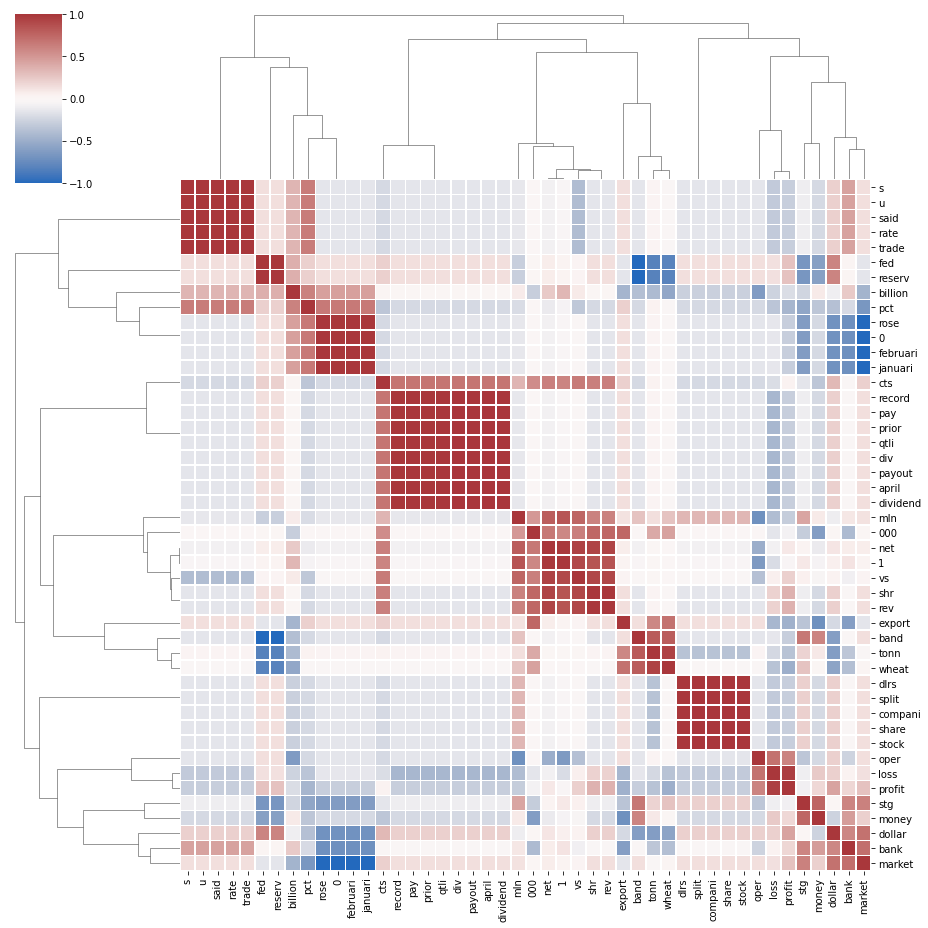

In [14]:
# Montando a matriz de similaridade 'por cosseno'.

sns.clustermap(df.corr(), center=0, cmap="vlag", metric='cosine',
               linewidths=.75, figsize=(13, 13))

In [15]:
lsi.show_topics(8,10)

[(0,
  '0.519*"vs" + 0.279*"000" + 0.273*"cts" + 0.271*"loss" + 0.242*"net" + 0.235*"mln" + 0.187*"shr" + 0.150*"profit" + 0.148*"rev" + 0.130*"1"'),
 (1,
  '-0.198*"vs" + 0.196*"pct" + 0.179*"bank" + 0.165*"billion" + 0.141*"u" + 0.139*"said" + -0.134*"loss" + 0.133*"rate" + 0.132*"s" + 0.120*"trade"'),
 (2,
  '0.378*"qtli" + 0.358*"div" + 0.292*"cts" + 0.290*"record" + 0.273*"prior" + 0.272*"pay" + 0.257*"april" + -0.232*"loss" + 0.200*"dividend" + 0.146*"payout"'),
 (3,
  '0.654*"loss" + -0.318*"billion" + 0.206*"profit" + -0.188*"vs" + -0.183*"mln" + -0.138*"stg" + -0.101*"net" + -0.090*"bank" + 0.089*"oper" + -0.087*"1"'),
 (4,
  '0.444*"loss" + -0.278*"000" + -0.275*"tonn" + 0.260*"stg" + 0.238*"bank" + 0.213*"billion" + 0.174*"profit" + 0.149*"money" + -0.125*"wheat" + -0.119*"export"'),
 (5,
  '-0.310*"stg" + -0.264*"bank" + 0.217*"billion" + 0.203*"februari" + 0.200*"januari" + 0.199*"pct" + -0.158*"dollar" + -0.155*"market" + 0.150*"0" + 0.135*"rose"'),
 (6,
  '0.298*"share" 

#### Podemos também olhar para os documentos do nosso corpus como uma combinação linear dos assuntos

In [16]:
for doc  in corpus_lsi:
    print(doc)
    break

[(0, 0.0932412922021401), (1, 0.38981526163689817), (2, -0.060245637687690375), (3, 0.11064739212682569), (4, -0.12780804520925354), (5, -0.11298541912951218), (6, -0.17160438139198467), (7, -0.1248707067157479)]


In [17]:
# Dando atenção a valores faltantes (NaN).

data = {'doc%s'%i: dict(doc) for i,doc in enumerate(corpus_lsi[:20])}
dfdoc = pd.DataFrame(data)
dfdoc = dfdoc.fillna(0)
dfdoc.head()

,doc0,doc1,doc2,doc3,doc4,doc5,doc6,doc7,doc8,doc9,doc10,doc11,doc12,doc13,doc14,doc15,doc16,doc17,doc18,doc19
0,0.093241,0.055430,0.051970,0.109750,0.033317,0.018459,0.061181,0.053554,0.053364,0.052735,0.013058,0.101022,0.069173,0.076908,0.060899,0.064904,0.386779,0.069582,0.091550,0.036717
1,0.389815,0.125566,0.168020,0.267968,0.146118,0.093202,0.220051,0.159338,0.097204,0.179938,0.073880,0.247117,0.104084,0.201413,0.321136,0.127721,0.036163,0.198707,0.277138,0.106925
2,-0.060246,-0.009774,-0.019353,-0.023879,-0.031184,0.006010,-0.021651,0.001079,-0.012338,-0.009022,-0.005411,-0.037390,-0.029844,0.001762,-0.044298,0.050018,-0.028005,-0.062382,-0.062637,-0.018109
3,0.110647,0.014579,0.032505,-0.071109,0.044382,0.042853,0.064186,0.069546,0.038330,0.034162,0.037686,-0.119581,0.060968,0.021031,0.113377,0.033577,-0.184284,-0.143297,-0.040009,0.038129
4,-0.127808,-0.064826,-0.022909,0.031428,-0.090808,-0.044086,-0.094219,-0.196957,-0.058803,0.030889,-0.035686,0.150016,0.022106,0.004034,-0.161103,-0.019552,0.075255,0.257138,0.021870,-0.050760


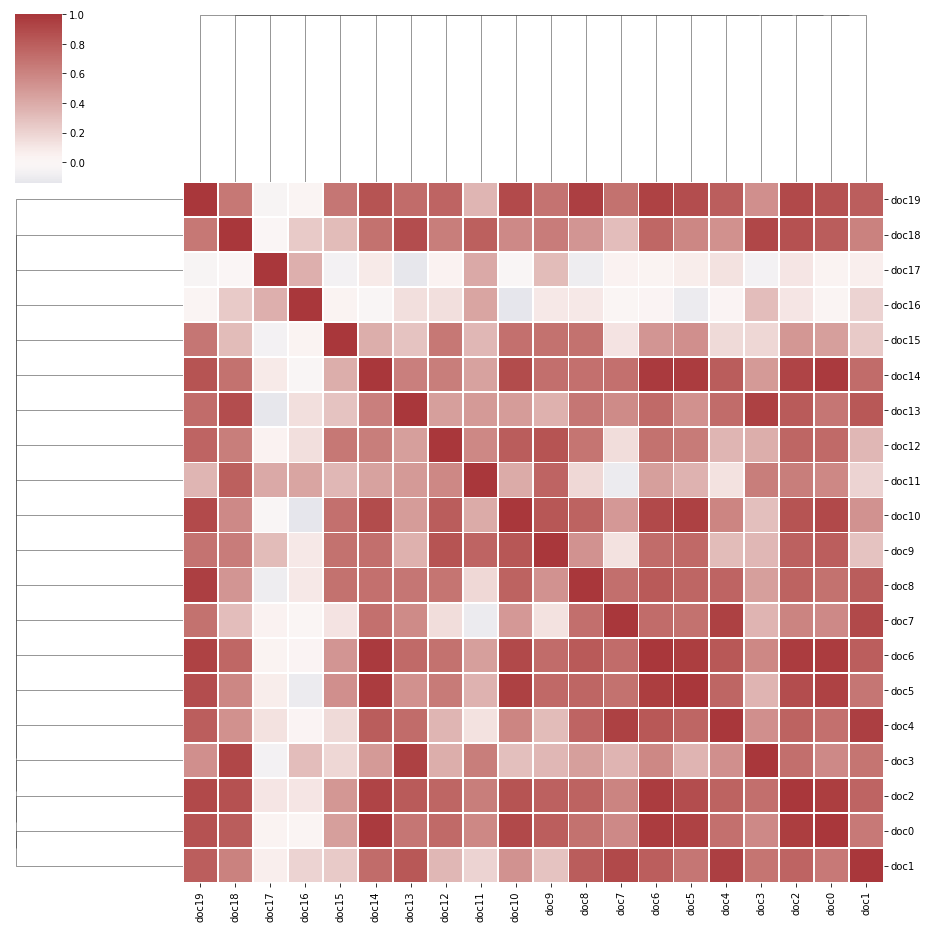

In [18]:
# Para esta visualização, utilizamos a métrica de Hamming, que corresponde ao menor número de substituições necessárias
# para transformar uma string na outra.

sns.clustermap(dfdoc.corr(), center=0, cmap="vlag", metric='hamming',
               linewidths=.75, figsize=(13, 13));

In [19]:
# Descrição (estatística) do dataframe.

dfdoc.T.describe()

,0,1,2,3,4,5,6,7
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.077680,0.177075,-0.020833,0.009884,-0.018739,-0.013097,-0.016039,0.017353
std,0.077012,0.089654,0.026571,0.080598,0.103302,0.106655,0.081506,0.106820
min,0.013058,0.036163,-0.062637,-0.184284,-0.196957,-0.336068,-0.171604,-0.124871
25%,0.052543,0.106215,-0.032736,0.000932,-0.071321,-0.040485,-0.055610,-0.033295
50%,0.061040,0.163679,-0.020502,0.035924,-0.029298,0.005612,-0.014750,-0.004691
75%,0.080569,0.226817,-0.008119,0.048529,0.024302,0.022741,0.038783,0.055432
max,0.386779,0.389815,0.050018,0.113377,0.257138,0.189560,0.135973,0.356178


In [20]:
# Para calcular a similaridade, por assunto, de um documento com os demais documentos do corpus

index = similarities.MatrixSimilarity(corpus_lsi)

#### Vamos escolher o primeiro documento do corpus para ser a referência
#### Optamos por mostrar as similaridades já em ordem decrescente, com o comando 'sorted'

In [21]:
sims = index[doc]
# pprint(list(enumerate(sims)))
pprint(sorted(list(enumerate(sims)), key=lambda x:x[1], reverse=True))

[(0, 1.0),
 (3700, 0.99597716),
 (1624, 0.99574196),
 (1115, 0.9954922),
 (5550, 0.99476045),
 (1221, 0.9941388),
 (1830, 0.9929438),
 (9099, 0.9920838),
 (728, 0.9920125),
 (59, 0.99152),
 (3605, 0.9911127),
 (8168, 0.991036),
 (6180, 0.9907823),
 (9571, 0.9907451),
 (9626, 0.9907451),
 (3829, 0.9905163),
 (4044, 0.99022675),
 (1114, 0.99005955),
 (2588, 0.9899879),
 (1107, 0.9899818),
 (5371, 0.98970056),
 (2623, 0.9896724),
 (1529, 0.98948514),
 (4087, 0.9890184),
 (5627, 0.9881047),
 (4620, 0.98793906),
 (4635, 0.98793906),
 (3244, 0.9879363),
 (5953, 0.9874564),
 (1190, 0.9874457),
 (6554, 0.9869783),
 (3845, 0.98678446),
 (9541, 0.98650044),
 (9662, 0.98629606),
 (5344, 0.98627084),
 (6295, 0.98595124),
 (9265, 0.98566127),
 (3429, 0.9856127),
 (169, 0.98533),
 (3954, 0.98502445),
 (10097, 0.98487234),
 (9448, 0.9848148),
 (2172, 0.9847457),
 (5551, 0.9846451),
 (7673, 0.98457146),
 (7743, 0.98457146),
 (3459, 0.98417366),
 (3516, 0.98417366),
 (6331, 0.9841465),
 (3781, 0.983981

 (8042, 0.7073366),
 (8311, 0.70725906),
 (4607, 0.70710665),
 (7997, 0.70702696),
 (1811, 0.7068911),
 (6181, 0.70681244),
 (10243, 0.70664465),
 (3153, 0.70642114),
 (5884, 0.70639783),
 (8098, 0.70615244),
 (9749, 0.7059785),
 (6088, 0.705965),
 (5655, 0.7058744),
 (1397, 0.705864),
 (47, 0.70580876),
 (387, 0.70568204),
 (6808, 0.705331),
 (6952, 0.7052292),
 (9840, 0.7050028),
 (3610, 0.70492196),
 (8154, 0.7048338),
 (4183, 0.7047497),
 (8451, 0.7045837),
 (9870, 0.7045729),
 (9223, 0.7045024),
 (8047, 0.70447826),
 (5935, 0.70445395),
 (737, 0.7043221),
 (1146, 0.704073),
 (10773, 0.70400333),
 (990, 0.70389795),
 (3155, 0.70383155),
 (3793, 0.703509),
 (748, 0.7034375),
 (5961, 0.70339197),
 (5502, 0.70337445),
 (4364, 0.70298433),
 (170, 0.7028629),
 (7652, 0.7027474),
 (3562, 0.7026869),
 (10666, 0.70253026),
 (4010, 0.70250714),
 (1826, 0.7024366),
 (212, 0.70233864),
 (5028, 0.70226264),
 (763, 0.70184934),
 (9866, 0.70166504),
 (3109, 0.7016412),
 (9110, 0.70162195),
 (846

 (9455, 0.4861734),
 (10185, 0.48601776),
 (1358, 0.4859453),
 (1390, 0.48588908),
 (3107, 0.4857731),
 (10541, 0.485726),
 (10211, 0.4856065),
 (9250, 0.48557627),
 (4679, 0.48553634),
 (7923, 0.48548546),
 (7248, 0.48538333),
 (531, 0.48530877),
 (2215, 0.4853075),
 (2902, 0.48519155),
 (5285, 0.48519138),
 (1444, 0.48517692),
 (10364, 0.4849561),
 (7617, 0.48492998),
 (6028, 0.4849161),
 (239, 0.48482174),
 (4648, 0.48475105),
 (1696, 0.48465306),
 (10712, 0.4846124),
 (7884, 0.48453304),
 (9616, 0.48452035),
 (5340, 0.48445255),
 (3525, 0.48439592),
 (6537, 0.4842835),
 (10556, 0.4842303),
 (4500, 0.48398405),
 (10202, 0.48378867),
 (8736, 0.48377246),
 (1474, 0.48343468),
 (4842, 0.48342618),
 (6011, 0.483419),
 (5647, 0.48341733),
 (4499, 0.4834049),
 (5080, 0.48338813),
 (2304, 0.4831892),
 (234, 0.48316944),
 (2198, 0.48298433),
 (6679, 0.482841),
 (4464, 0.482679),
 (3330, 0.48264104),
 (8558, 0.48262367),
 (5789, 0.48259947),
 (8041, 0.48246098),
 (9093, 0.482427),
 (2247, 0.

 (1300, 0.3100952),
 (2116, 0.30984858),
 (3401, 0.3098148),
 (7037, 0.30977622),
 (7918, 0.30977598),
 (6267, 0.30973598),
 (6354, 0.30965188),
 (6090, 0.30957043),
 (4629, 0.309354),
 (7712, 0.30914515),
 (3650, 0.30909517),
 (8208, 0.30905825),
 (1302, 0.30903798),
 (2953, 0.30899853),
 (8197, 0.3089296),
 (8401, 0.30868945),
 (173, 0.3085146),
 (8845, 0.30817273),
 (8903, 0.30814403),
 (7368, 0.30806592),
 (10753, 0.30806112),
 (5005, 0.3080481),
 (3714, 0.30790257),
 (4820, 0.3078038),
 (9379, 0.30773932),
 (8828, 0.30759993),
 (6079, 0.30747354),
 (10009, 0.30744287),
 (8356, 0.3073924),
 (4142, 0.30734792),
 (4627, 0.30726784),
 (10035, 0.30716464),
 (5930, 0.3071307),
 (6778, 0.30707717),
 (4579, 0.30694485),
 (4375, 0.30693904),
 (1327, 0.3066717),
 (1693, 0.30647534),
 (7654, 0.3063489),
 (4677, 0.30628592),
 (683, 0.30617753),
 (10333, 0.30606732),
 (4374, 0.3060266),
 (5161, 0.3059813),
 (4405, 0.3058703),
 (8089, 0.30580446),
 (2716, 0.30574548),
 (1699, 0.3057373),
 (5197

 (10169, 0.07489666),
 (10765, 0.07488656),
 (1007, 0.07488158),
 (6059, 0.07481016),
 (10527, 0.0747862),
 (5714, 0.074773684),
 (1921, 0.07472128),
 (4615, 0.0747114),
 (1148, 0.07466763),
 (4135, 0.07458894),
 (2598, 0.07457546),
 (5307, 0.074569196),
 (9322, 0.0745229),
 (1379, 0.074504405),
 (3577, 0.07449946),
 (9038, 0.07447134),
 (9343, 0.074443474),
 (10396, 0.07439277),
 (7472, 0.07436521),
 (310, 0.07436279),
 (5495, 0.074323274),
 (2806, 0.074321),
 (7165, 0.07425941),
 (2809, 0.0742462),
 (194, 0.07423526),
 (4139, 0.074216925),
 (2838, 0.07419506),
 (9994, 0.0741806),
 (9622, 0.074154645),
 (2672, 0.07412478),
 (8902, 0.07412441),
 (7998, 0.074119195),
 (4954, 0.07411688),
 (8694, 0.07408936),
 (2092, 0.074036166),
 (10462, 0.07401954),
 (8574, 0.07401491),
 (1018, 0.073990405),
 (2721, 0.07394474),
 (2892, 0.07390331),
 (4294, 0.073875785),
 (488, 0.07387342),
 (10657, 0.07384806),
 (9898, 0.07383372),
 (7450, 0.07382667),
 (7859, 0.07377003),
 (9256, 0.073729314),
 (88,

## Latent Dirichlet Allocation - LDA

#### O LDA é uma técnica um pouco mais sofisticada que o LSI, que envolve uma interpretação probabilística do que é um assunto.

#### Trata-se, assim como o LSI, de uma técnica de redução de dimensionalidade, mas 'enxergando' os documentos como uma 'mistura' aleatória de tópicos, onde cada tópico é caracterizado por uma distribuição de palavras.

In [22]:
# Parametrizando o modelo LDA - "Isso leva um pouco de tempo..."

lda = models.ldamodel.LdaModel(corpus, id2word=dicionario, num_topics=10, passes=10)

In [23]:
lda.show_topics(10)

[(0,
  '0.025*"said" + 0.022*"gold" + 0.019*"mine" + 0.018*"stock" + 0.015*"the" + 0.014*"price" + 0.014*"cocoa" + 0.013*"buffer" + 0.011*"ton" + 0.011*"produc"'),
 (1,
  '0.038*"cts" + 0.032*"lt" + 0.026*"april" + 0.025*"dividend" + 0.023*"record" + 0.016*"pay" + 0.015*"div" + 0.014*"stock" + 0.014*"share" + 0.013*"march"'),
 (2,
  '0.079*"vs" + 0.066*"mln" + 0.042*"000" + 0.037*"net" + 0.036*"cts" + 0.030*"loss" + 0.029*"1" + 0.026*"dlrs" + 0.022*"shr" + 0.019*"2"'),
 (3,
  '0.044*"pct" + 0.032*"billion" + 0.028*"bank" + 0.018*"said" + 0.017*"1" + 0.017*"the" + 0.014*"year" + 0.014*"rate" + 0.014*"2" + 0.013*"mln"'),
 (4,
  '0.019*"say" + 0.017*"franc" + 0.014*"west" + 0.014*"said" + 0.013*"baker" + 0.012*"currenc" + 0.012*"pari" + 0.011*"" + 0.008*"germani" + 0.008*"gencorp"'),
 (5,
  '0.052*"oil" + 0.028*"said" + 0.022*"price" + 0.012*"barrel" + 0.012*"crude" + 0.010*"gas" + 0.009*"the" + 0.009*"coffe" + 0.009*"mln" + 0.008*"product"'),
 (6,
  '0.042*"said" + 0.027*"lt" + 0.026*"sh

In [24]:
# Nosso novo dataframe, também com elementos faltantes...

data_new = {i: OrderedDict(lsi.show_topic(i,10)) for i in range(10)}
pd.DataFrame(data_new)

,0,1,2,3,4,5,6,7,8,9
vs,0.519270,-0.198432,NaN,-0.187528,NaN,NaN,NaN,NaN,NaN,NaN
000,0.279477,NaN,NaN,NaN,-0.278214,NaN,NaN,NaN,NaN,NaN
cts,0.272880,NaN,0.291627,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loss,0.271310,-0.133752,-0.231805,0.654364,0.443635,NaN,-0.133570,NaN,NaN,NaN
net,0.241906,NaN,NaN,-0.101039,NaN,NaN,NaN,NaN,NaN,NaN
mln,0.234797,NaN,NaN,-0.182899,NaN,NaN,0.149216,0.128287,NaN,NaN
shr,0.187191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
profit,0.150216,NaN,NaN,0.205801,0.173966,NaN,NaN,NaN,NaN,NaN
rev,0.148243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.129915,NaN,NaN,-0.086790,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
print(lda.show_topic(9,5))
OrderedDict(lda.show_topic(0,5))

[('said', 0.03314175), ('', 0.021824058), ('u', 0.019781876), ('s', 0.018964615), ('trade', 0.016330348)]


OrderedDict([('said', 0.02467718),
             ('gold', 0.022208586),
             ('mine', 0.019017227),
             ('stock', 0.017519198),
             ('the', 0.014774476)])

In [26]:
# Dimensão do nosso novo df.

df_new = pd.DataFrame(data_new)
print(df_new.shape)
df_new = df_new.fillna(0).T

(46, 10)


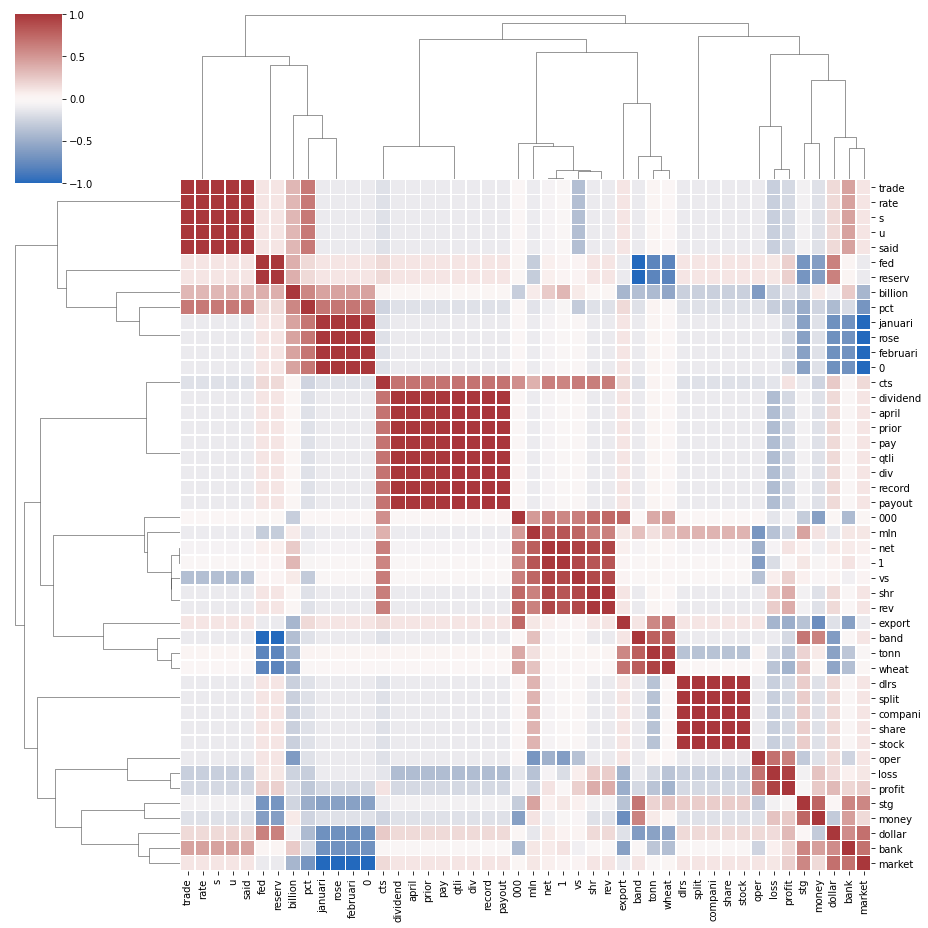

In [27]:
# Montando a nova matriz de similaridade cosseno.

sns.clustermap(df_new.corr(), center=0, cmap="vlag", metric='cosine',
               linewidths=.75, figsize=(13, 13))

In [28]:
lda.show_topics(9,10)

[(3,
  '0.044*"pct" + 0.032*"billion" + 0.028*"bank" + 0.018*"said" + 0.017*"1" + 0.017*"the" + 0.014*"year" + 0.014*"rate" + 0.014*"2" + 0.013*"mln"'),
 (8,
  '0.039*"said" + 0.020*"year" + 0.019*"dlrs" + 0.017*"compani" + 0.015*"mln" + 0.013*"the" + 0.012*"1986" + 0.011*"" + 0.010*"sale" + 0.009*"earn"'),
 (6,
  '0.042*"said" + 0.027*"lt" + 0.026*"share" + 0.020*"compani" + 0.015*"dlrs" + 0.015*"inc" + 0.014*"offer" + 0.013*"the" + 0.013*"pct" + 0.011*"corp"'),
 (7,
  '0.032*"tonn" + 0.019*"said" + 0.017*"mln" + 0.017*"000" + 0.016*"export" + 0.014*"" + 0.014*"the" + 0.011*"u" + 0.011*"wheat" + 0.011*"s"'),
 (9,
  '0.033*"said" + 0.022*"" + 0.020*"u" + 0.019*"s" + 0.016*"trade" + 0.013*"would" + 0.013*"the" + 0.010*"market" + 0.008*"japan" + 0.006*"govern"'),
 (4,
  '0.019*"say" + 0.017*"franc" + 0.014*"west" + 0.014*"said" + 0.013*"baker" + 0.012*"currenc" + 0.012*"pari" + 0.011*"" + 0.008*"germani" + 0.008*"gencorp"'),
 (1,
  '0.038*"cts" + 0.032*"lt" + 0.026*"april" + 0.025*"divid

 #### Podemos, uma vez mais, olhar para os documentos do nosso corpus como uma combinação linear dos assuntos

In [29]:
corpus_lda = lda[corpus_tfidf]

In [30]:
for doc  in corpus_lda:
    print(doc)
    break

[(8, 0.10466351), (9, 0.83829767)]


In [31]:
# Dando nova atenção a valores faltantes (NaN).

data_new = {'doc%s'%i: dict(doc) for i,doc in enumerate(corpus_lda[:20])}
dfdoc_new = pd.DataFrame(data_new)
dfdoc_new = dfdoc_new.fillna(0)
dfdoc_new.head()

,doc0,doc1,doc2,doc3,doc4,doc5,doc6,doc7,doc8,doc9,doc10,doc11,doc12,doc13,doc14,doc15,doc16,doc17,doc18,doc19
8,0.104617,0.015041,0.289974,0.264905,0.014846,0.620072,0.010133,0.015383,0.169145,0.043422,0.016973,0.011998,0.383977,0.577760,0.092205,0.015210,0.077298,0.014264,0.011248,0.396570
9,0.838333,0.269049,0.275919,0.012002,0.111910,0.271700,0.436318,0.015385,0.013988,0.521505,0.243249,0.258816,0.250098,0.015612,0.581937,0.080680,0.014916,0.014266,0.553288,0.012918
0,0.000000,0.015041,0.013180,0.039004,0.014847,0.013545,0.131310,0.232579,0.679219,0.000000,0.412301,0.011998,0.177045,0.015606,0.000000,0.329031,0.014339,0.014263,0.011138,0.021589
1,0.000000,0.015039,0.013178,0.012001,0.014851,0.013525,0.010109,0.015387,0.013988,0.183935,0.016973,0.012171,0.014376,0.015606,0.000000,0.039620,0.014324,0.014266,0.011137,0.013582
2,0.000000,0.015042,0.013179,0.012001,0.014927,0.013524,0.010122,0.015383,0.013988,0.000000,0.016971,0.011997,0.014398,0.015606,0.000000,0.015212,0.797304,0.089308,0.011138,0.012408


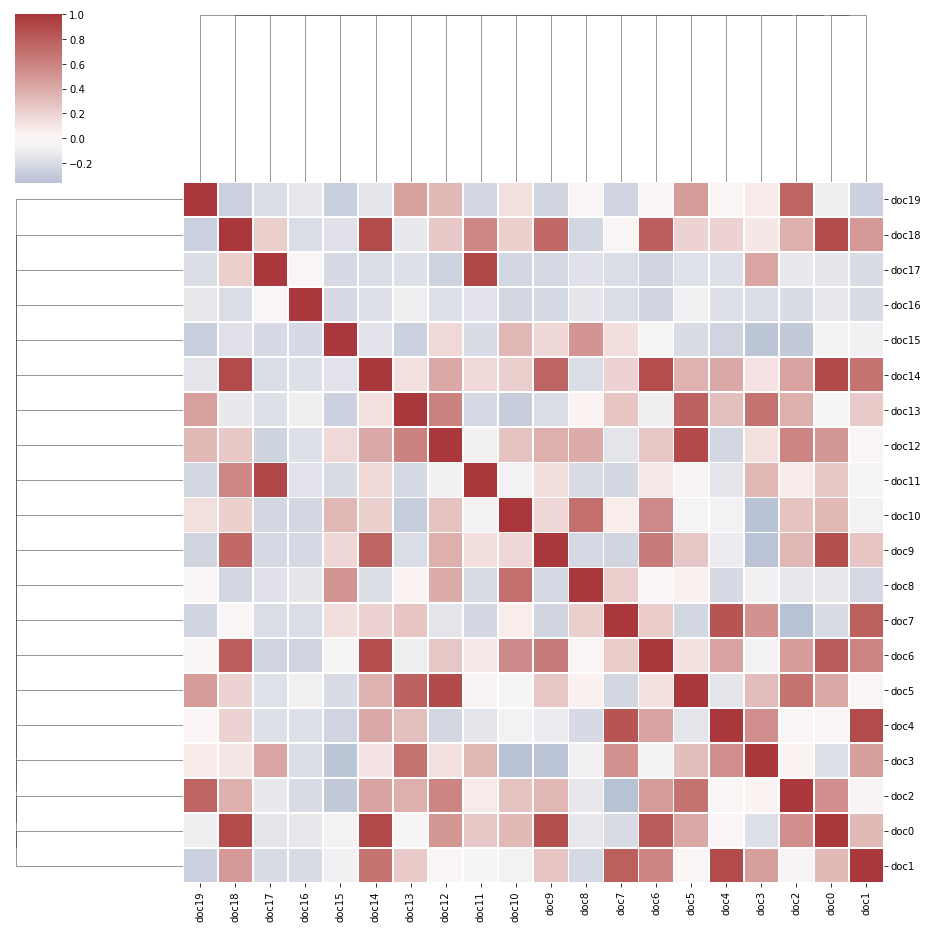

In [32]:
# Uma vez mais usamos a 'distância de Hamming'.

sns.clustermap(dfdoc_new.corr(), center=0, cmap="vlag", metric='hamming',
               linewidths=.75, figsize=(13, 13));

In [33]:
# Descrição (estatística) do novo dataframe.

dfdoc_new.T.describe()

,8,9,0,1,2,3,4,5,6,7
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.157252,0.239594,0.107302,0.022203,0.054625,0.108987,0.011731,0.075958,0.058744,0.154396
std,0.197403,0.239880,0.180016,0.038817,0.175749,0.222721,0.005319,0.130624,0.106596,0.208188
min,0.010133,0.012002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.014992,0.015268,0.012884,0.012129,0.011783,0.013274,0.011784,0.012006,0.012011,0.013440
50%,0.060360,0.246673,0.014944,0.014127,0.013756,0.015131,0.013757,0.014362,0.014302,0.014967
75%,0.271173,0.316019,0.142744,0.015126,0.015255,0.034294,0.014894,0.054532,0.065737,0.267390
max,0.620072,0.838333,0.679219,0.183935,0.797304,0.796576,0.016977,0.492787,0.459396,0.612504


#### Podemos agora calcular a nova similaridade por assunto de um documento com todos os demais documentos do corpus

In [34]:
# Para calcular a nova similaridade, por assunto, de um documento com os demais documentos do corpus.

index_new = similarities.MatrixSimilarity(corpus_lda)

#### Vamos escolher novamente o primeiro documento do corpus como referência

#### Optamos por mostrar as similaridades já em ordem decrescente, com o comando 'sorted'

In [35]:
sims = index_new[doc]
# pprint(list(enumerate(sims)))
pprint(sorted(list(enumerate(sims)), key=lambda x:x[1], reverse=True))

[(0, 1.0),
 (761, 0.99996686),
 (169, 0.99993193),
 (6569, 0.9994317),
 (10097, 0.99936193),
 (9541, 0.99932617),
 (4044, 0.99932534),
 (1118, 0.9993223),
 (1830, 0.9992492),
 (3403, 0.9992241),
 (6331, 0.9991774),
 (9598, 0.9991701),
 (9370, 0.9990617),
 (3244, 0.99905586),
 (8878, 0.9989928),
 (10129, 0.99892944),
 (7039, 0.99881047),
 (8816, 0.9988052),
 (1452, 0.9987086),
 (2244, 0.9986335),
 (4363, 0.99863255),
 (1771, 0.99855554),
 (1890, 0.9984695),
 (38, 0.99834794),
 (3179, 0.9982415),
 (9857, 0.9981169),
 (2588, 0.9980114),
 (1190, 0.9979683),
 (1192, 0.99794316),
 (6618, 0.9979426),
 (6571, 0.99793833),
 (7819, 0.9978871),
 (3605, 0.99785596),
 (202, 0.99783653),
 (8139, 0.99776614),
 (3429, 0.9977146),
 (6938, 0.9977097),
 (3402, 0.9975442),
 (1114, 0.99749476),
 (6554, 0.9974547),
 (5158, 0.9972606),
 (10683, 0.9971883),
 (1107, 0.9970643),
 (10426, 0.99703336),
 (3417, 0.9968651),
 (10492, 0.99682593),
 (7347, 0.9966419),
 (2578, 0.9965139),
 (5185, 0.9964593),
 (9633, 0.

 (1996, 0.16622414),
 (4957, 0.16563496),
 (341, 0.16554815),
 (2669, 0.16552013),
 (6904, 0.16541716),
 (9669, 0.16504839),
 (4190, 0.16494331),
 (6549, 0.16475041),
 (6435, 0.16450983),
 (5153, 0.16436788),
 (3699, 0.16409549),
 (10696, 0.16398215),
 (5514, 0.16396041),
 (7103, 0.16384098),
 (8758, 0.16371253),
 (6299, 0.1631842),
 (10389, 0.1625099),
 (5482, 0.16222443),
 (8975, 0.16215876),
 (7621, 0.16167405),
 (2129, 0.16163823),
 (818, 0.16145203),
 (9585, 0.1613683),
 (4801, 0.16135623),
 (8594, 0.16134185),
 (5257, 0.1612785),
 (2062, 0.16110925),
 (4600, 0.16098689),
 (8444, 0.16096857),
 (6533, 0.16091159),
 (5325, 0.16079675),
 (4944, 0.16068074),
 (4527, 0.16068064),
 (8339, 0.1606573),
 (7606, 0.1605995),
 (3318, 0.16052556),
 (3397, 0.16035272),
 (622, 0.16034138),
 (1187, 0.16027728),
 (6364, 0.15992917),
 (347, 0.15980154),
 (6737, 0.15979236),
 (3081, 0.1591925),
 (4428, 0.15913023),
 (4095, 0.15889585),
 (8811, 0.15871507),
 (6838, 0.15868303),
 (7252, 0.15867676),
 

 (8390, 0.062197696),
 (7553, 0.062186174),
 (812, 0.062173273),
 (8177, 0.06210678),
 (5981, 0.062104277),
 (3088, 0.0621001),
 (3711, 0.062007282),
 (5460, 0.061925918),
 (8224, 0.061920807),
 (10736, 0.061903156),
 (6221, 0.061828487),
 (6313, 0.06174522),
 (4082, 0.061703436),
 (1401, 0.061699875),
 (4568, 0.061694704),
 (3952, 0.061681032),
 (3155, 0.06167835),
 (10730, 0.061664563),
 (3541, 0.061633684),
 (482, 0.06162734),
 (6323, 0.061600495),
 (6053, 0.061565865),
 (8099, 0.06155375),
 (3529, 0.061443843),
 (8706, 0.061384212),
 (5458, 0.061376717),
 (3206, 0.06133991),
 (3085, 0.061339904),
 (3144, 0.061339904),
 (5738, 0.061339904),
 (5040, 0.0613399),
 (10718, 0.0613399),
 (4996, 0.061339896),
 (7801, 0.061272502),
 (1233, 0.06124695),
 (267, 0.061221037),
 (372, 0.061180815),
 (10208, 0.061176345),
 (5709, 0.06116209),
 (7531, 0.061081212),
 (6487, 0.060968835),
 (2171, 0.060949028),
 (4851, 0.060908493),
 (10081, 0.060813367),
 (1120, 0.060716487),
 (7137, 0.060650438),
 

 (4136, 0.034566805),
 (3997, 0.034552414),
 (5846, 0.034552164),
 (3758, 0.034544263),
 (8021, 0.034544192),
 (6781, 0.034543842),
 (490, 0.034535885),
 (4569, 0.03453365),
 (8252, 0.03452977),
 (226, 0.03452844),
 (4800, 0.034523983),
 (2911, 0.034515683),
 (10247, 0.034513697),
 (7231, 0.03451256),
 (9594, 0.034511272),
 (5055, 0.03451122),
 (5983, 0.03450822),
 (7266, 0.034506876),
 (3131, 0.034504056),
 (1427, 0.034500197),
 (2483, 0.034493912),
 (884, 0.03448426),
 (6545, 0.0344831),
 (9150, 0.03447657),
 (1722, 0.034472913),
 (3202, 0.034462623),
 (6810, 0.03445757),
 (10780, 0.034447867),
 (10316, 0.03443441),
 (5949, 0.034434006),
 (7290, 0.034428746),
 (6830, 0.034427803),
 (168, 0.034422502),
 (9356, 0.034410212),
 (10370, 0.03439729),
 (5829, 0.03439209),
 (10004, 0.034388665),
 (9085, 0.034386393),
 (9393, 0.034382686),
 (5567, 0.034381825),
 (7723, 0.03437925),
 (6981, 0.034375522),
 (5006, 0.034371216),
 (7640, 0.034368202),
 (2940, 0.03435662),
 (1738, 0.034353595),
 (4

 (8033, 0.025068492),
 (487, 0.025067322),
 (7994, 0.025067091),
 (1065, 0.025065433),
 (4638, 0.025061391),
 (511, 0.025060149),
 (4514, 0.025049992),
 (967, 0.025036473),
 (2908, 0.025035467),
 (5340, 0.025033498),
 (6497, 0.025032923),
 (10308, 0.02502577),
 (4398, 0.025025524),
 (2435, 0.02502394),
 (7282, 0.02502304),
 (7769, 0.025022577),
 (6481, 0.025022395),
 (10214, 0.0250187),
 (1106, 0.0250171),
 (2094, 0.02501233),
 (1638, 0.025011811),
 (1903, 0.02501099),
 (5969, 0.025000071),
 (6291, 0.02499694),
 (9483, 0.02499248),
 (6399, 0.024991844),
 (7150, 0.024987586),
 (10063, 0.024987329),
 (10334, 0.024980754),
 (6496, 0.024973055),
 (5473, 0.024971416),
 (9649, 0.024970988),
 (3996, 0.024969365),
 (680, 0.024962053),
 (7932, 0.024951024),
 (6433, 0.024944996),
 (6372, 0.024931831),
 (5115, 0.024929821),
 (1256, 0.024926584),
 (1040, 0.024923168),
 (7728, 0.024922501),
 (1636, 0.024921853),
 (889, 0.024915393),
 (5905, 0.024915135),
 (7617, 0.024904247),
 (9452, 0.024904046),


 (3641, 0.01691889),
 (2682, 0.016896544),
 (6698, 0.016890334),
 (7859, 0.0168799),
 (3490, 0.016862284),
 (7309, 0.016860554),
 (9776, 0.01683352),
 (7512, 0.01682928),
 (10173, 0.016800987),
 (7939, 0.016789343),
 (6631, 0.016779622),
 (4070, 0.01675219),
 (9332, 0.01674494),
 (10679, 0.016732596),
 (7773, 0.016727017),
 (3082, 0.016714504),
 (1172, 0.016704615),
 (8411, 0.016693892),
 (2402, 0.01666078),
 (2869, 0.016654994),
 (7717, 0.016607149),
 (1318, 0.016605144),
 (7130, 0.016600674),
 (10395, 0.016595101),
 (10355, 0.016588762),
 (2678, 0.016563976),
 (2163, 0.016555706),
 (1847, 0.01654144),
 (10665, 0.016515752),
 (551, 0.016510002),
 (2915, 0.016487233),
 (5253, 0.016485056),
 (7518, 0.01648338),
 (3447, 0.016474929),
 (2899, 0.016463533),
 (1769, 0.016437601),
 (8881, 0.016423963),
 (5578, 0.01641561),
 (7332, 0.016385674),
 (7406, 0.01637435),
 (7722, 0.016367562),
 (6071, 0.016355418),
 (6676, 0.016329387),
 (8330, 0.016323883),
 (755, 0.016295414),
 (8625, 0.01628306)